# Comparison between the genders for the ages and types

Questions

- What are the differences between the gender for the different combinations of ages and types?
- Do we observe the same changes as globally?

# Loads

## Libraries and functions

In [1]:
source("load_libraries.R")

Warning message in is.na(x[[i]]):
“is.na() applied to non-(list or vector) of type 'environment'”Warning message in rsqlite_fetch(res@ptr, n = n):
“Don't need to call dbFetch() for statements, only for queries”

*
*  Package WGCNA 1.63 loaded.
*
*    Important note: It appears that your system supports multi-threading,
*    but it is not enabled within WGCNA in R. 
*    To allow multi-threading within WGCNA with all available cores, use 
*
*          allowWGCNAThreads()
*
*    within R. Use disableWGCNAThreads() to disable threading if necessary.
*    Alternatively, set the following environment variable on your system:
*
*          ALLOW_WGCNA_THREADS=<number_of_processors>
*
*    for example 
*
*          ALLOW_WGCNA_THREADS=4
*
*    To set the environment variable in linux bash shell, type 
*
*           export ALLOW_WGCNA_THREADS=4
*
*     before running R. Other operating systems or shells will
*     have a similar command to achieve the same aim.
*


Allowing multi-threading with up to 4 threads.
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "prepar

In [2]:
source("functions.R")

## Data

In [3]:
load("../results/dge/gene_length.RData")
load("../results/dge/metadata.RData")
load("../results/dge/norm_counts.RData")
load("../results/dge/dge.RData")

In [4]:
load("../results/dge/dge_net.RData")
load("../results/dge/dge_layout.RData")
load("../results/dge/dge_net_connected_gene_colors.RData")
load("../results/dge/dge_net_pal2.RData")

In [5]:
module_nb = length(unique(connected_gene_colors))
pal2 = c(pal2, "white", "black")

In [6]:
# Interactions between genders and ages (after controlling type)
M_F_SPF_8w = results(dge,contrast= c(0,1,0,0,0,0,0,0,0,0), alpha=0.05, test="Wald")
M_F_GF_8w = results(dge,contrast= c(0,1,0,0,0,0,0,1,0,0), alpha=0.05, test="Wald")
M_F_SPF_52w = results(dge,contrast= c(0,1,0,0,0,0,1,0,0,0), alpha=0.05, test="Wald")
M_F_GF_52w = results(dge,contrast= c(0,1,0,0,0,0,1,1,0,0), alpha=0.05, test="Wald")
M_F_SPF_104w = results(dge,contrast= c(0,1,0,0,0,1,0,0,0,0), alpha=0.05, test="Wald")
M_F_GF_104w = results(dge,contrast= c(0,1,0,0,0,1,0,1,0,0), alpha=0.05, test="Wald")

In [7]:
to_comp = c("M VS F (SPF, 8w)", "M VS F (GF, 8w)", "M VS F (SPF, 52w)", "M VS F (GF, 52w)", "M VS F (SPF, 104w)", "M VS F (GF, 104w)")

# Differentially expressed genes

In [8]:
gender_age_type_data = list(M_F_SPF_8w, M_F_GF_8w, M_F_SPF_52w, M_F_GF_52w, M_F_SPF_104w, M_F_GF_104w)
names(gender_age_type_data) = to_comp
gender_age_type_deg = extract_diff_expr_genes(gender_age_type_data, "gender-effect/gender_type_age/")

Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in stack.default(getgo(rownames(l$sign_fc_deg), "mm10", "geneSymbol")):
“non-vector elements will be ignored”Warning message in stack.default(getgo(rownames(as.data.frame(l$deg)), "mm10", "geneSymbol", :
“non-vector elements will be ignored”

# Stats

,All DEG (Wald padj < 0.05),All over-expressed genes (Wald padj < 0.05 & FC > 0),All under-expressed genes (Wald padj < 0.05 & FC < 0),DEG (Wald padj < 0.05 & abs(FC) >= 1.5),Over-expressed genes (Wald padj < 0.05 & FC >= 1.5),Under-expressed genes (Wald padj < 0.05 & FC <= -1.5)
"M VS F (SPF, 8w)",2462,1291,1171,1204,978,226
"M VS F (GF, 8w)",2730,1419,1311,1287,1047,240
"M VS F (SPF, 52w)",3459,1735,1724,1571,1196,375
"M VS F (GF, 52w)",3346,1689,1657,1630,1227,403
"M VS F (SPF, 104w)",290,148,142,112,53,59
"M VS F (GF, 104w)",95,40,55,84,38,46


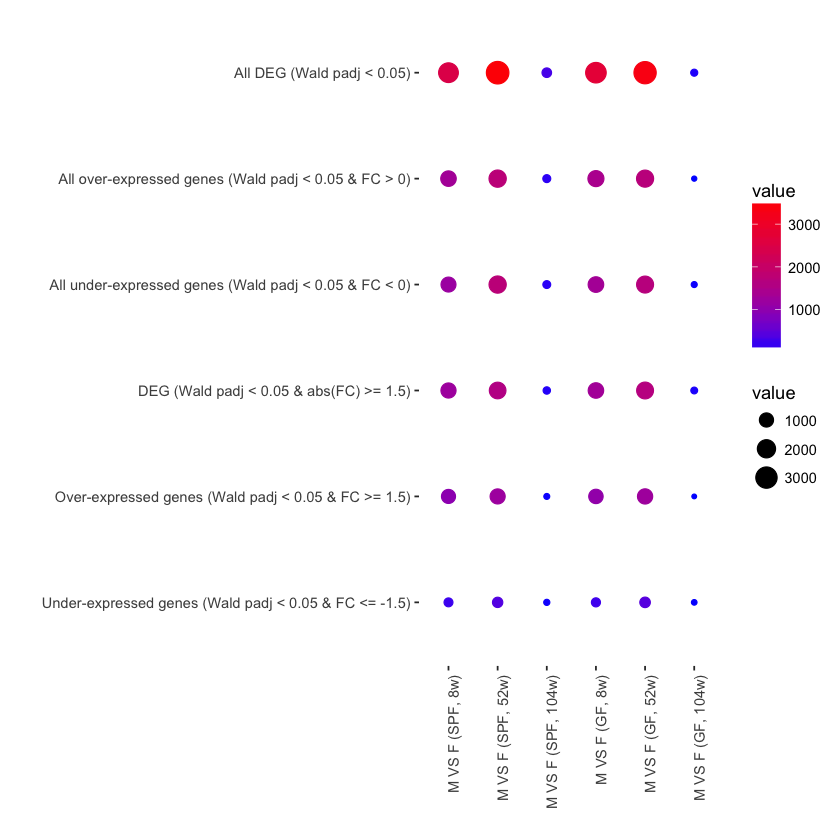

In [9]:
gender_age_type_deg$stat
plot_stat_mat(gender_age_type_deg$stat)

## All DEG (Wald padj < 0.05)

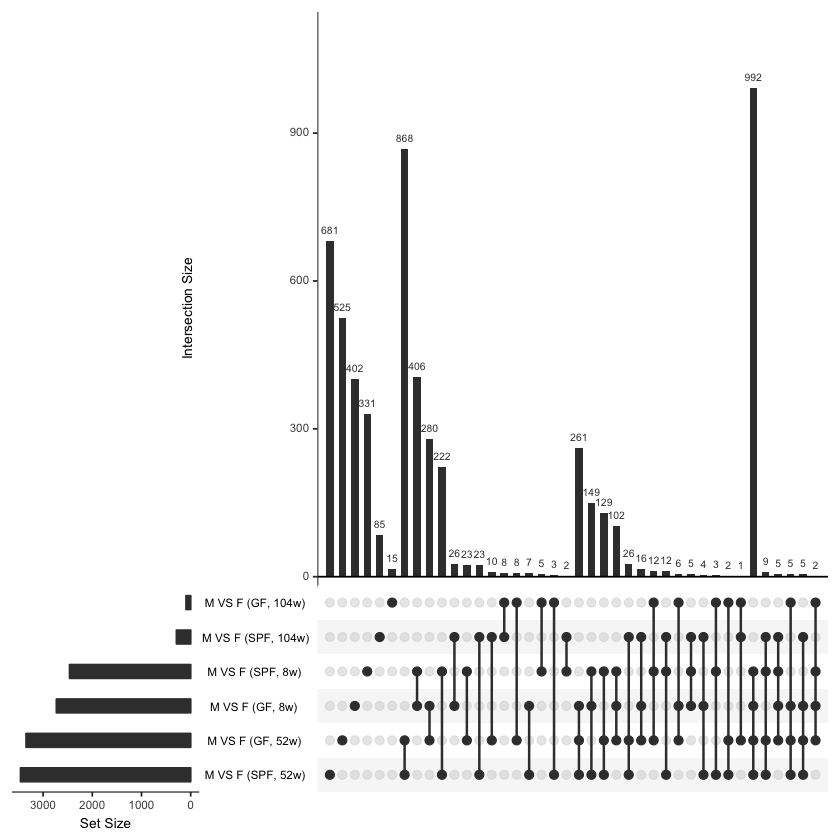

In [10]:
# Differentially expressed genes
upset(as.data.frame(gender_age_type_deg$deg),nsets = 6)

## DEG (Wald padj < 0.05 & abs(FC) > 1.5)

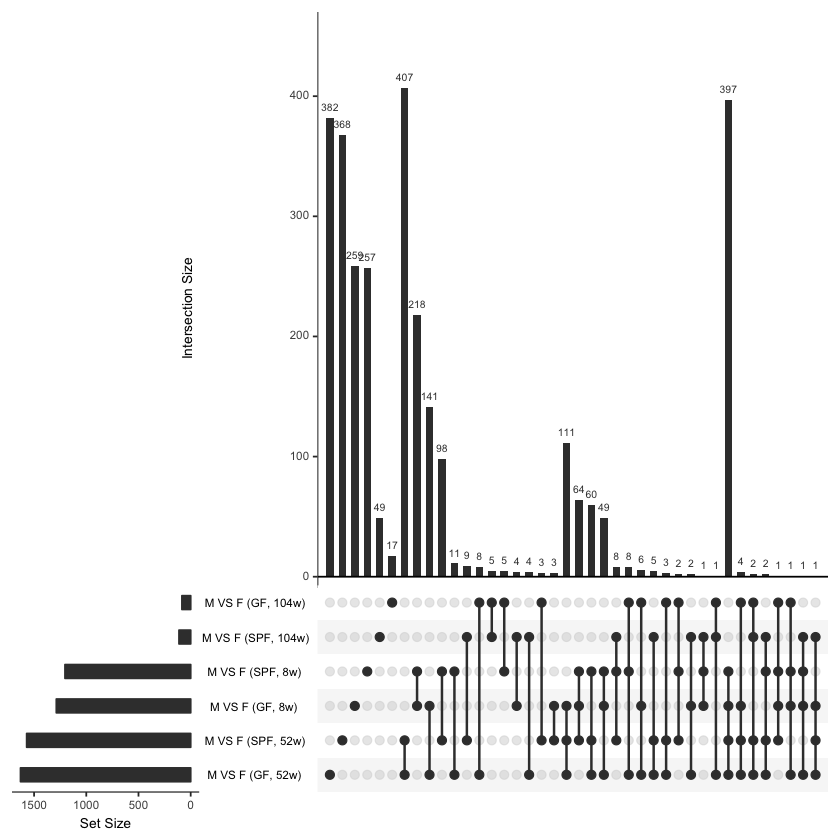

In [11]:
upset(as.data.frame(1*(!is.na(gender_age_type_deg$sign_fc_deg))),nsets = 6)

# Log2FC for DEG (Wald padj < 0.05 & abs(FC) > 1.5)

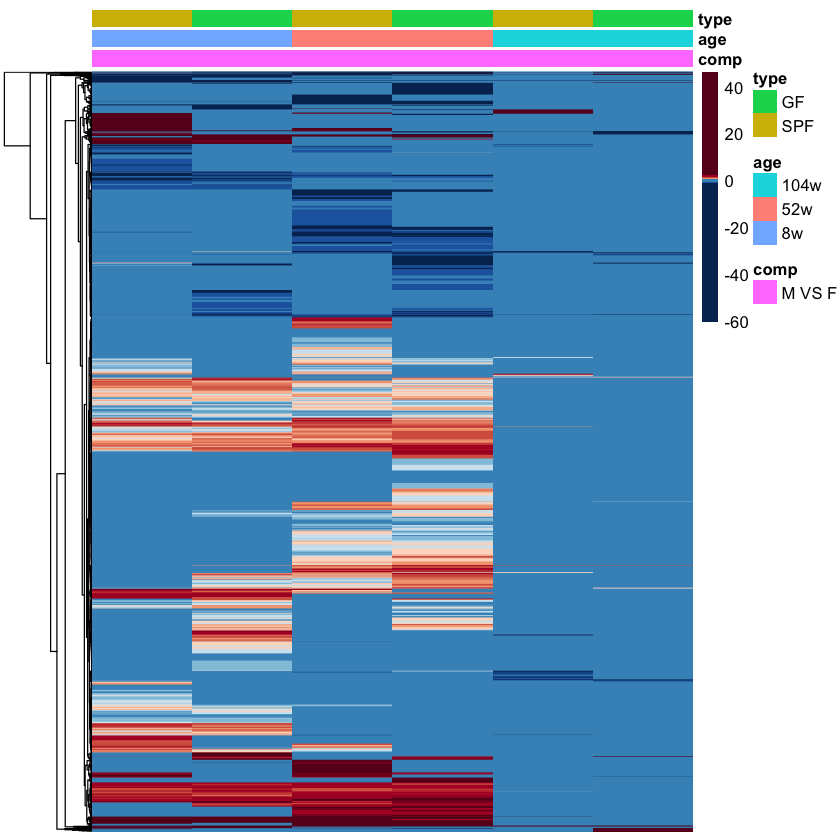

In [12]:
fc_annot = data.frame(comp = rep("M VS F",6),
                      age = c(rep("8w",2),rep("52w",2),rep("104w",2)),
                      type = rep(c("SPF","GF"),3))
rownames(fc_annot) = colnames(gender_age_type_deg$sign_fc_deg)
plot_fc_heatmap(gender_age_type_deg$sign_fc_deg, fc_annot)

# DEG into gene co-expression network

- White: up-regulated 
- Black: down-regulated

M vs F | 8w | 52w | 104w
--- | --- | --- | ---
SPF | | |
GF | | | 

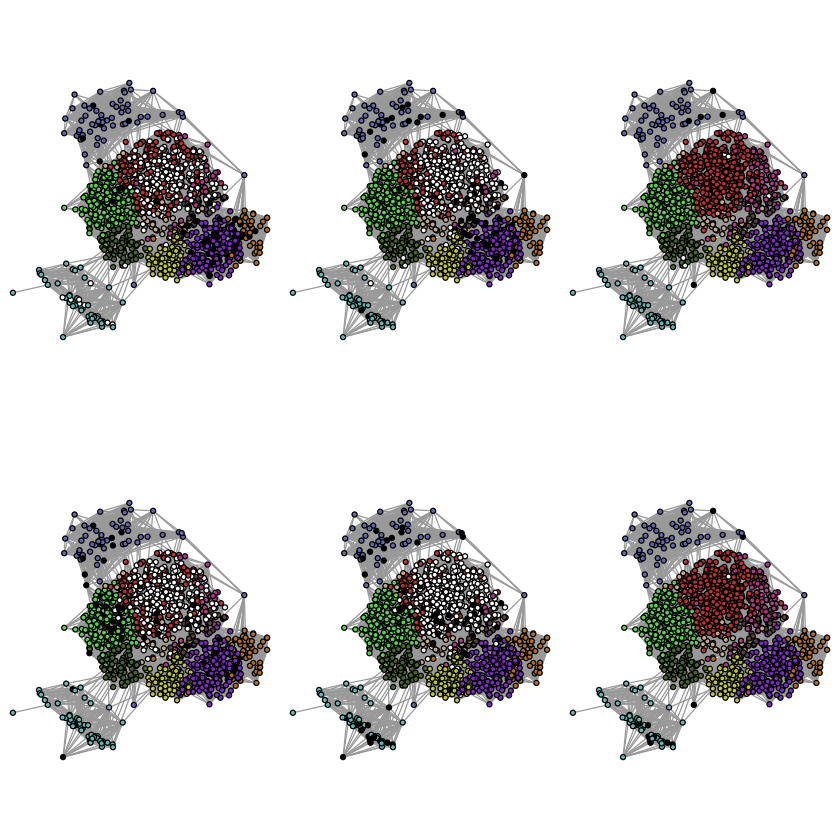

In [13]:
par(mfrow=c(2,3),mar=c(0,0,0,0))
col_M_vs_F_8w_SPF = get_deg_colors(gender_age_type_deg, "M VS F (SPF, 8w)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_M_vs_F_8w_SPF, pal2, layout, add_legend = FALSE)
col_M_vs_F_8w_GF = get_deg_colors(gender_age_type_deg, "M VS F (SPF, 52w)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_M_vs_F_8w_GF, pal2, layout, add_legend = FALSE)
col_M_vs_F_52w_SPF = get_deg_colors(gender_age_type_deg, "M VS F (SPF, 104w)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_M_vs_F_52w_SPF, pal2, layout, add_legend = FALSE)
col_M_vs_F_52w_GF = get_deg_colors(gender_age_type_deg, "M VS F (GF, 8w)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_M_vs_F_52w_GF, pal2, layout, add_legend = FALSE)
col_M_vs_F_104w_SPF = get_deg_colors(gender_age_type_deg, "M VS F (GF, 52w)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_M_vs_F_104w_SPF, pal2, layout, add_legend = FALSE)
col_M_vs_F_104w_GF = get_deg_colors(gender_age_type_deg, "M VS F (GF, 104w)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_M_vs_F_104w_GF, pal2, layout, add_legend = FALSE)

# GO analysis

In [14]:
full_go_desc = gender_age_type_deg$GO_wall[[1]][,"term"]
names(full_go_desc) = gender_age_type_deg$GO_wall[[1]][,"category"]
comp = colnames(gender_age_type_deg$over_represented_GO)
comp = comp[4:length(comp)]

## Biological process

Dot-plot with the most over-represented BP GO (20 most significant p-values for the different comparison)

Using term, id as id variables
Using term, id as id variables


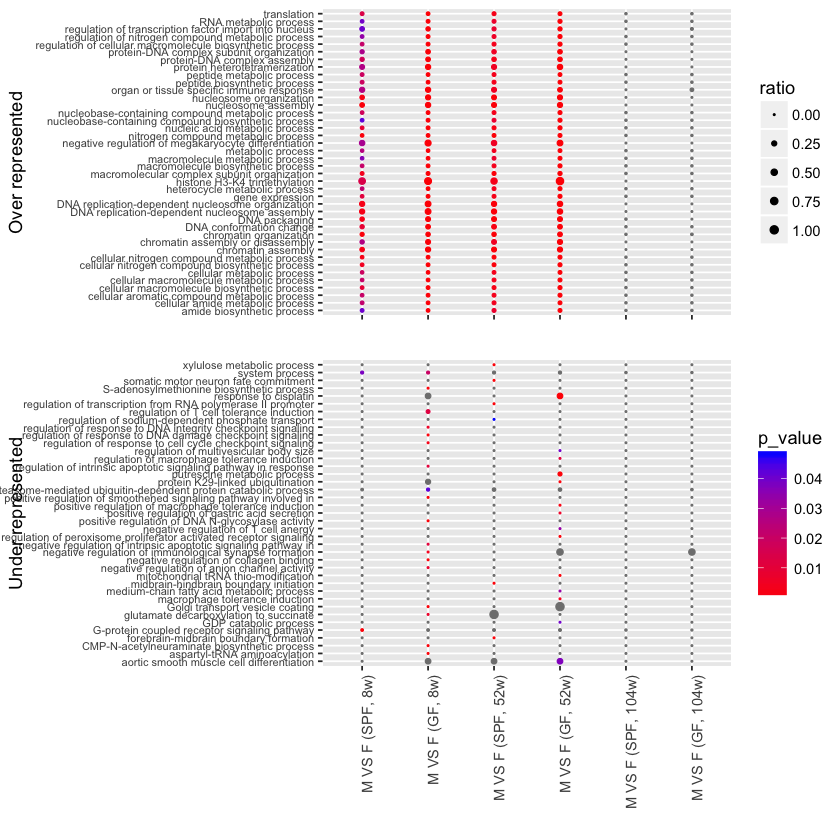

In [15]:
plot_top_go(gender_age_type_deg,
            "BP",
            40)

Network based on description similarity

In [16]:
BP_network = create_GO_network(gender_age_type_deg, "BP", BP_GO)

M vs F | 8w | 52w | 104w
--- | --- | --- | ---
SPF | | |
GF | | | 

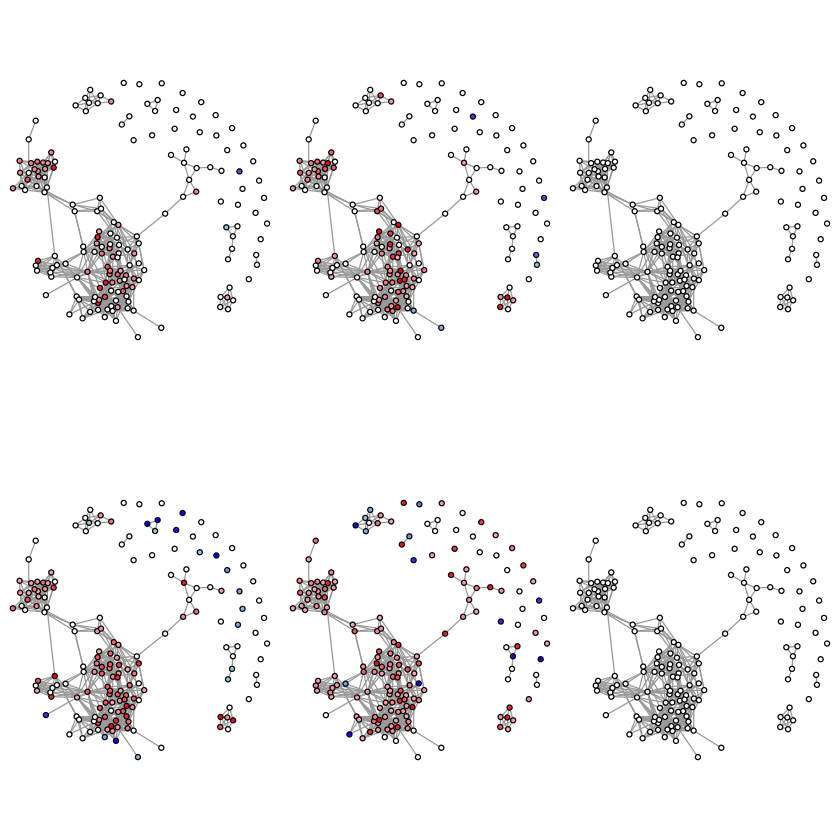

In [17]:
par(mfrow=c(2,3),mar=c(0,0,0,0))
plot_GO_networks(BP_network, "M VS F (SPF, 8w)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "M VS F (SPF, 52w)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "M VS F (SPF, 104w)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "M VS F (GF, 8w)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "M VS F (GF, 52w)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "M VS F (GF, 104w)", full_go_desc, plot_interactive = FALSE)

### M VS F (SPF, 8w)

In [18]:
col = get_GO_network_col(BP_network, "M VS F (SPF, 8w)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/gender-effect/gender_type_age/go/M_VS_F_SPF_8w",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/gender-effect/gender_type_age/go/M_VS_F_SPF_8w.png)

GO Tree at "../results/dge/gender-effect/gender_type_age/go/M_VS_F_SPF_8w.png"

### M VS F (GF, 8w)

In [19]:
col = get_GO_network_col(BP_network, "M VS F (GF, 8w)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/gender-effect/gender_type_age/go/M_VS_F_GF_8w",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/gender-effect/gender_type_age/go/M_VS_F_GF_8w.png)

GO Tree at "../results/dge/gender-effect/gender_type_age/go/M_VS_F_GF_8w.png"

### M VS F (SPF, 52w)

In [20]:
col = get_GO_network_col(BP_network, "M VS F (SPF, 52w)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/gender-effect/gender_type_age/go/M_VS_F_SPF_52w",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/gender-effect/gender_type_age/go/M_VS_F_SPF_52w.png)

GO Tree at "../results/dge/gender-effect/gender_type_age/go/M_VS_F_SPF_52w.png"

### M VS F (GF, 52w)

In [21]:
col = get_GO_network_col(BP_network, "M VS F (GF, 52w)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/gender-effect/gender_type_age/go/M_VS_F_GF_52w",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/gender-effect/gender_type_age/go/M_VS_F_GF_52w.png)

GO Tree at "../results/dge/gender-effect/gender_type_age/go/M_VS_F_GF_52w.png"

### M VS F (SPF, 104w)

In [22]:
col = get_GO_network_col(BP_network, "M VS F (SPF, 104w)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/gender-effect/gender_type_age/go/M_VS_F_SPF_104w",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/gender-effect/gender_type_age/go/M_VS_F_SPF_104w.png)

GO Tree at "../results/dge/gender-effect/gender_type_age/go/M_VS_F_SPF_104w.png"

### M VS F (GF, 104w)

In [23]:
col = get_GO_network_col(BP_network, "M VS F (GF, 104w)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/gender-effect/gender_type_age/go/M_VS_F_GF_104w",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/gender-effect/gender_type_age/go/M_VS_F_GF_104w.png)

GO Tree at "../results/dge/gender-effect/gender_type_age/go/M_VS_F_GF_104w.png"

## Cellular components

Dot-plot with the most over-represented CC GO (20 most significant p-values for the different comparison)

Using term, id as id variables
Using term, id as id variables


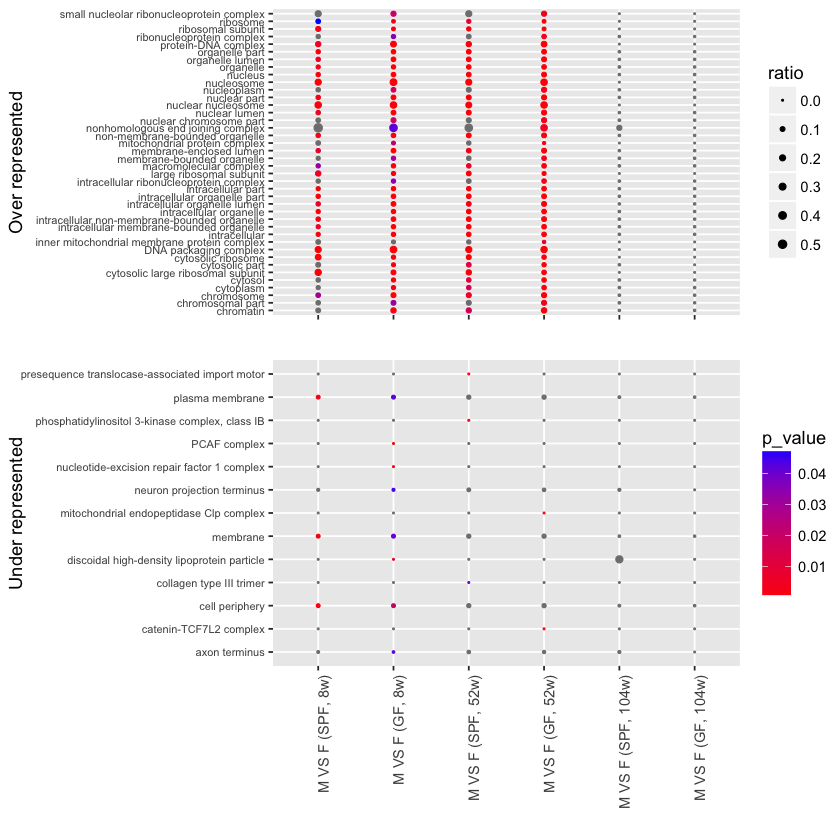

In [24]:
plot_top_go(gender_age_type_deg,
            "CC",
            40)

## Molecular functions

Dot-plot with the most over-represented MF GO (20 most significant p-values for the different comparison)

Using term, id as id variables
Using term, id as id variables


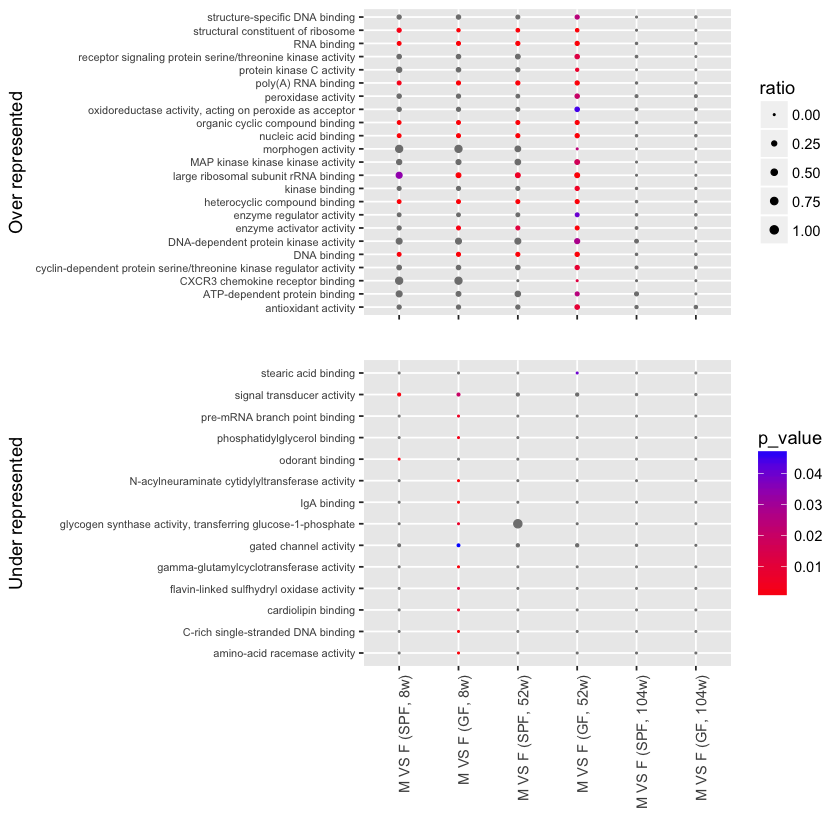

In [25]:
plot_top_go(gender_age_type_deg,
            "MF",
            40)

# KEGG pathways

In [26]:
plot_kegg_pathways(gender_age_type_deg$over_represented_KEGG[,"category"],
                   gender_age_type_deg$fc_deg,
                   "../results/dge/gender-effect/gender_type_age/kegg/over_repr_kegg/")

Warning message in file.rename(from = paste("mmu", cat, ".pathview.multi.png", sep = ""), :
“cannot rename file 'mmu03010.pathview.multi.png' to '../results/dge/gender-effect/gender_type_age/kegg/over_repr_kegg/mmu03010.pathview.multi.png', reason 'No such file or directory'”

ERROR: Error in `$<-.data.frame`(`*tmp*`, "labels", value = c("", "", "", "", : replacement has 34 rows, data has 48


Pathway graphs available at ../results/dge/type-effect/type_gender_age/over_repr_kegg/

In [ ]:
plot_kegg_pathways(gender_age_type_deg$under_represented_KEGG[,"category"],
                   gender_age_type_deg$fc_deg,
                   "../results/dge/gender-effect/gender_type_age/kegg/under_repr_kegg/")

Pathway graphs available at ../results/dge/type-effect/type_gender_age/under_repr_kegg/